In [44]:
import re
import numpy as np

In [45]:
with open('./data/kaijin_nijumenso.txt',mode='r',encoding='utf-8') as f:
  book_original = f.read()

In [46]:
def preprocessText(text):
  text = re.sub('《[^》]+》','',text)
  text = re.sub('［[^］]+］','',text)
  text = re.sub('[｜　 ]','',text)

  print("文字数: ",len(text))

  return text

In [47]:
text = preprocessText(book_original)

文字数:  110323


In [48]:
n_rnn = 10
batch_size = 128
epochs = 10
n_mid = 256

In [49]:
chars = sorted(list(set(text)))
print("文字数(重複なし): ",len(chars))
char_indices = {}
char_indices = dict((c,i) for i,c in enumerate(chars))
indices_char = {}
indices_char = dict((i,c) for i,c in enumerate(chars))

time_chars = []
next_chars = []

for i in range(0,len(text)-n_rnn):
  time_chars.append(text[i:i+n_rnn])
  next_chars.append(text[i+n_rnn])

x = np.zeros((len(time_chars),n_rnn,len(chars)),dtype=np.bool_)
t = np.zeros((len(time_chars),len(chars)),dtype=np.bool_)

for i,t_cs in enumerate(time_chars):
  t[i,char_indices[next_chars[i]]] = 1
  for j,char in enumerate(t_cs):
    x[i,j,char_indices[char]] = 1

print("xの形状: ",x.shape)
print("tの形状: ",t.shape)

文字数(重複なし):  1249
xの形状:  (110313, 10, 1249)
tの形状:  (110313, 1249)


In [50]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [51]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=n_mid,input_shape=(n_rnn,len(chars))))
model_lstm.add(Dense(len(chars),activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy',optimizer='adam')
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               1542144   
                                                                 
 dense_1 (Dense)             (None, 1249)              320993    
                                                                 
Total params: 1,863,137
Trainable params: 1,863,137
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
from keras.callbacks import LambdaCallback

In [55]:
from keras.callbacks import LambdaCallback
def on_epoch_end(epoch,logs):
  print("エポック: ",epoch)

  beta = 5
  prev_text = text[0:n_rnn]
  created_text = prev_text

  print("シード: ",created_text)

  for i in range(200):
    x_pred = np.zeros((1,n_rnn,len(chars)))
    for j,char in enumerate(prev_text):
      x_pred[0,j,char_indices[char]] = 1
  
    y = model.predict(x_pred)
    p_power = y[0] ** beta
    next_index = np.random.choice(len(p_power),p=p_power/np.sum(p_power))
    next_char = indices_char[next_index]

    created_text += next_char
    prev_text = prev_text[1:] + next_char

  print(created_text)
  print()

epock_end_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [56]:
model = model_lstm
history_lstm = model_lstm.fit(x,t,batch_size=batch_size,epochs=epochs,callbacks=[epock_end_callback])

Epoch 1/10
862/862 [==============================] - ETA: 0s - loss: 3.9560エポック:  0
シード:  そのころ、東京中の町
1/1 [==============================] - 0s 18ms/step
そのころ、東京中の町のです。
「あ、それは、そのです。
「あ、そうに、そのです。
「は、そうは、いうのです。
「は、あっているのです。
「あ、あっているのです。
「あ、そうに、ことは、ことは、このです。
「あ、それに、あっているのです。
「こと、おいているのです。
「あ、そうに、そのです。
「あ、あっているのです。
「あ、ありました。
「あ、そうに、そのです。
「あ、あいました。
「あ、そうに、それに、ことは、こので

862/862 [==============================] - 113s 132ms/step - loss: 3.9560
Epoch 2/10
862/862 [==============================] - ETA: 0s - loss: 3.6280エポック:  1
シード:  そのころ、東京中の町
1/1 [==============================] - 0s 21ms/step
そのころ、東京中の町のです。
「あ、それないるのです。
「あ、それないのです。
「あ、それないかり、そのです。
「それに、その中に、そのです。
「あ、あるのです。
「あ、それないのです。
「あり、そのないのです。
「それを、それて、その中に、そのにかりませんから、そのほどのです。
「あ、それないから、そのです。
「それないるのです。
「あ、それないうに、そのです。
「あ、それないのです。
「あ、それから、そのです。


862/862 [==============================] - 119s 138ms/step - loss: 3.6280
Epoch 3/10
862/862 [==============================] - ETA: 0s - loss: 3.4093エポック:  2
シード:  そのころ、東京中の町
1/1 [=============

In [57]:
from keras.layers import GRU

In [59]:
model_gru = Sequential()
model_gru.add(GRU(n_mid,input_shape=(n_rnn,len(chars))))
model_gru.add(Dense(len(chars),activation='softmax'))
model_gru.compile(loss='categorical_crossentropy',optimizer='adam')
print(model_gru.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               1157376   
                                                                 
 dense_2 (Dense)             (None, 1249)              320993    
                                                                 
Total params: 1,478,369
Trainable params: 1,478,369
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model = model_gru
histoory_gru = model_gru.fit(
  x,t,
  batch_size=batch_size,
  epochs=epochs,
  callbacks = [epock_end_callback]
)

Epoch 1/10
862/862 [==============================] - ETA: 0s - loss: 4.3729エポック:  0
シード:  そのころ、東京中の町
1/1 [==============================] - 0s 20ms/step
そのころ、東京中の町をしているのです。
「それに、そのです。
「そうに、そのです。
「こと、そのです。
「そのです。
「こと、こんないうに、ことをしているのです。
「そうなんです。
「そのです。
「それに、そのです。
「それは、そのです。
「そのです。
「そうに、そのです。
「そうに、それに、そのです。
「このです。
「それは、そのです。
「そのです。
「こと、そのです。
「そうに、そのです。
「いうは、そのです。


862/862 [==============================] - 97s 110ms/step - loss: 4.3729
Epoch 2/10
862/862 [==============================] - ETA: 0s - loss: 3.4453エポック:  1
シード:  そのころ、東京中の町
1/1 [==============================] - 0s 25ms/step
そのころ、東京中の町には、この中には、このことを、ことものです。
「こと、ことがいっているのです。
「それが、このです。
「あ、そのです。
「あい、このです。
「そうして、それをしているのです。
「あ、そうに、その中に、その中には、その中には、そのことを見えて、ましたのです。
「こと、こんないから、そのうには、その中には、そのから、そのには、その中には、このほどもうから、このです。
「そうに、このです。
「あ、そので

862/862 [==============================] - 101s 118ms/step - loss: 3.4453
Epoch 3/10
862/862 [==============================] - ETA: 0s - loss: 3.1024エポック:  2
シード:  そのころ、東京中の町
1/1 [==============

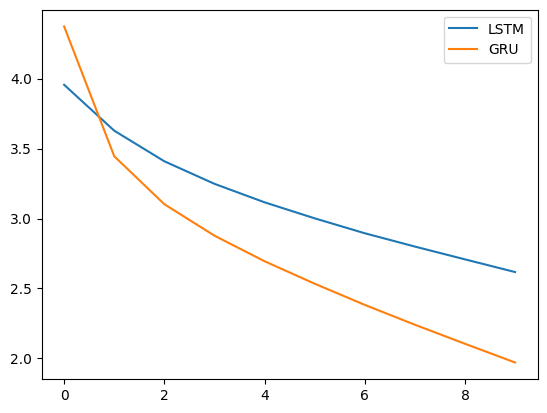

In [61]:
import matplotlib.pyplot as plt

loss_lstm = history_lstm.history['loss']
loss_gru = histoory_gru.history['loss']

plt.plot(np.arange(len(loss_lstm)),loss_lstm,label='LSTM')
plt.plot(np.arange(len(loss_gru)),loss_gru,label='GRU')
plt.legend()
plt.show()